In [66]:
import os
import cv2
import pickle as pkl
import matplotlib.pyplot as plt
img_path = "../../download_from_drive/data/ProcessedO7/34113_O7_0534.jpg"

cmd = "python predict.py --model_weights=best_model.ckpt --image_path=\"{}\"".format(img_path)
os.system(cmd)

0

In [67]:
dumped = pkl.load(open("dump.pkl", "rb"))
table = dumped["table"]
column = dumped["column"]

column = column.numpy()[0, 0, :, :]
table  = table.numpy()[0,0,:,:]

In [68]:
def thresh(m, t):
    m = m > t
    return m.astype(int)

def plot_img(img, mask, figsize=(15, 10)):
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    axes[0].imshow(img)
    axes[1].imshow(mask)
    for ax in axes:
        ax.axis('off')
    plt.show()

0.25


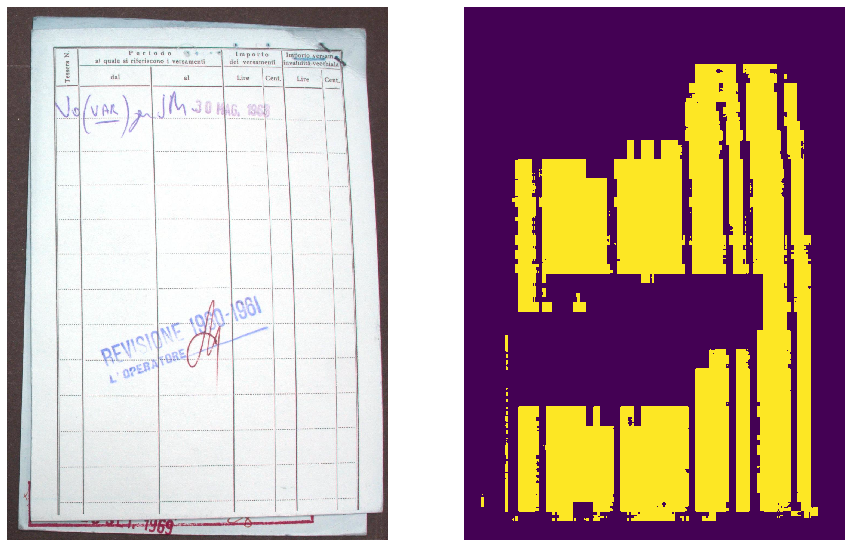



0.35


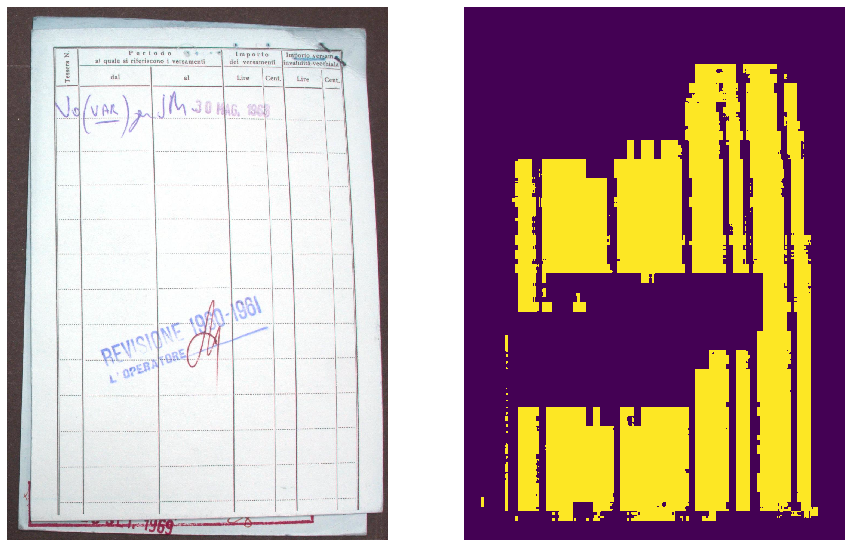



0.5


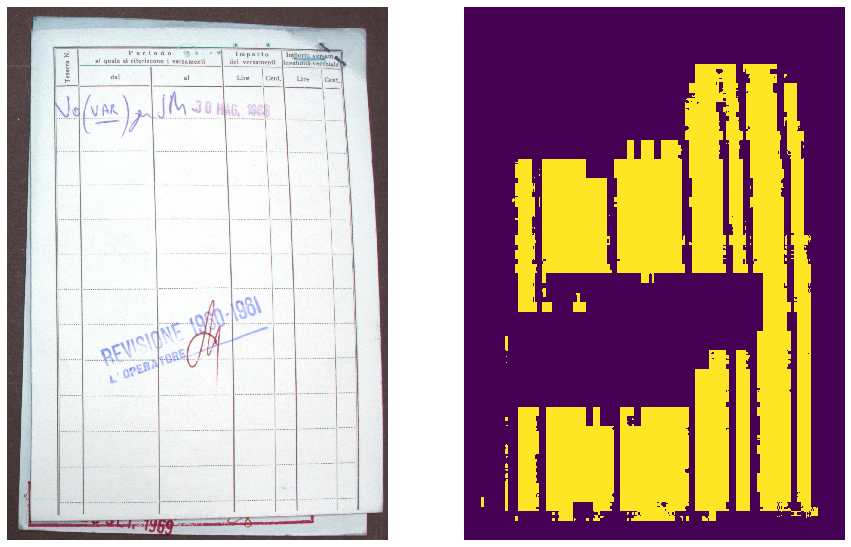



0.65


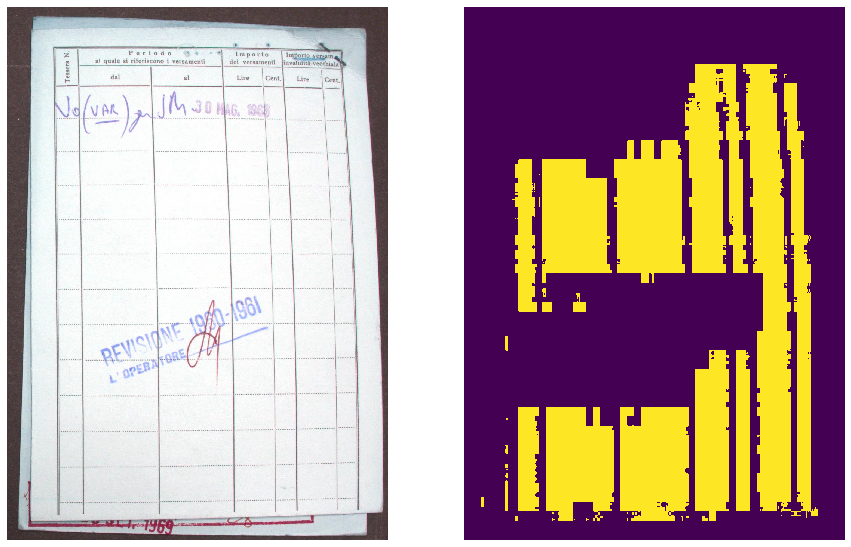



0.8


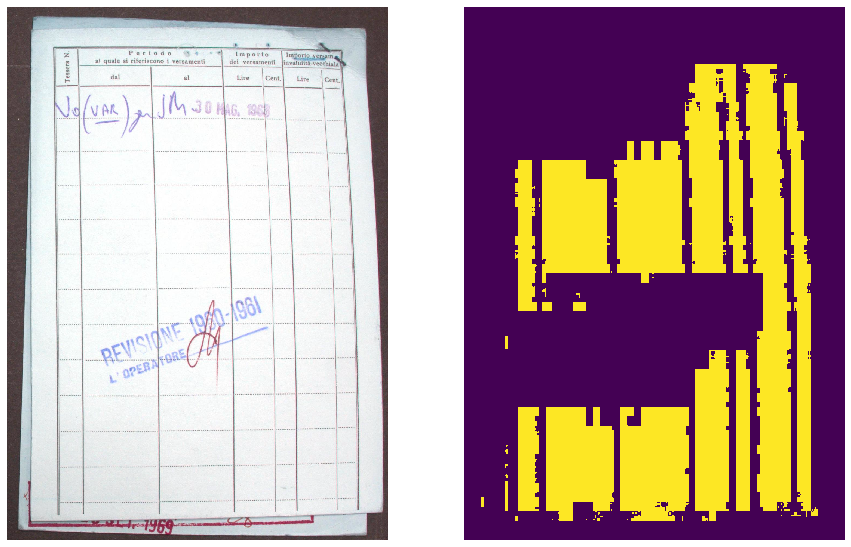

In [69]:
for t in [0.25, 0.35, 0.5, 0.65, 0.8]:
    print(t)
    img = cv2.imread(img_path)
    m = cv2.resize(column, (img.shape[1], img.shape[0]))
    m = thresh(m, t)
    plot_img(img, m)
    print()
    print()  

In [81]:
import albumentations as album
import torch
import pytorch_lightning as pl
from albumentations.pytorch.transforms import ToTensorV2
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping, LearningRateMonitor

from tablenet.marmot import MarmotDataset
from tablenet import TableNetModule

image_size = (896, 896)
transforms_augmentation = album.Compose([
    album.Resize(1024, 1024, always_apply=True),
    album.RandomResizedCrop(*image_size, scale=(0.7, 1.0), ratio=(0.7, 1)),
    album.HorizontalFlip(),
    album.VerticalFlip(),
    album.Normalize(),
    ToTensorV2()
])

transforms_preprocessing = album.Compose([
    album.Resize(*image_size, always_apply=True),
    album.Normalize(),
    ToTensorV2()
])

ds = MarmotDataModule(
    data_dir="./data/Marmot_data",
    transforms_preprocessing=transforms_preprocessing,
    transforms_augmentation=transforms_augmentation, 
    batch_size=2
)

In [83]:
x = ds.complaint_val.__getitem__(0)

In [85]:
x1, x2, x3 = x

In [89]:
x1.numpy().shape

(3, 896, 896)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


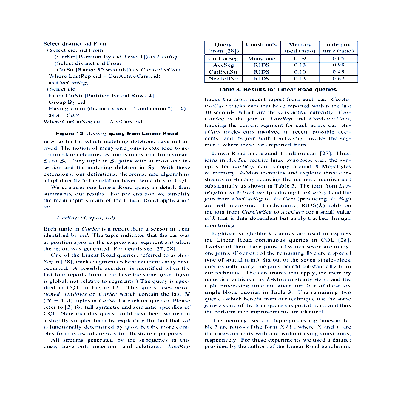

In [95]:
import numpy as np
import matplotlib.pyplot as plt
a = np.zeros((x1.shape[1], x1.shape[2], 3))
for i in range(3):
    a[:,:,i] = x1[i,:,:]
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(a)

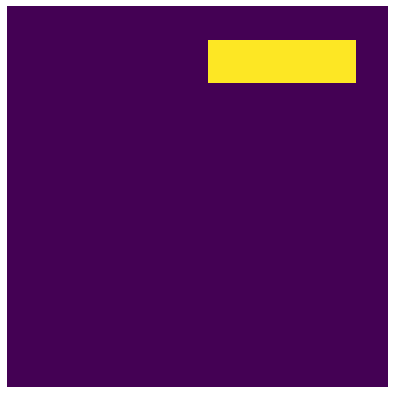

In [98]:
x2 = x2.numpy()[0,:,:]
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(x2)

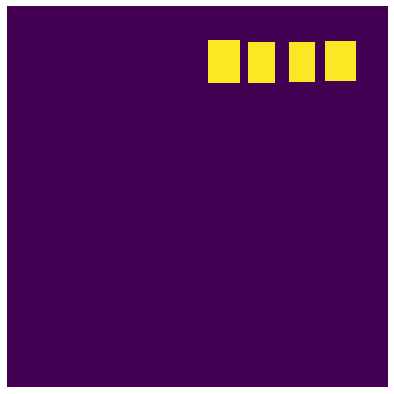

In [99]:
x3 = x3.numpy()[0,:,:]
plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(x3)